In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_train = df_train.drop(columns=['id']) 

df_test = pd.read_csv('test.csv')
df_test = df_test.drop(columns=['id'])

In [3]:
df_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f282,f283,f284,f285,f286,f287,f288,f289,f290,target
0,2014-01-29,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,2.0,...,1,0,0,2,8,1,0,19,2,9500000
1,2014-04-07,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,NaN,...,0,0,0,0,4,0,0,2,0,3837949
2,2012-05-18,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,46,9,2,11,38,1,8,97,11,6250000
3,2013-02-08,44,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,17,4,1,12,12,0,1,55,7,2000000
4,2014-01-10,45,28.0,3.0,5.0,2.0,1960.0,2.0,5.0,NaN,...,20,2,0,4,16,1,4,47,5,6700000


In [4]:
y = df_train['target']
df_train = df_train.drop(columns=['target']) 

In [5]:
len_train = len(df_train)
len_test = len(df_test)
print('len_train',len_train)
print('len_test',len_test)

len_train 24376
len_test 6095


In [6]:
all_data = pd.concat([df_train, df_test])

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 6094
Columns: 290 entries, f1 to f290
dtypes: float64(119), int64(155), object(16)
memory usage: 67.7+ MB


float64(119), 

int64(156), 

object(16)

Text(0.5, 1.0, 'Percent missing data by feature')

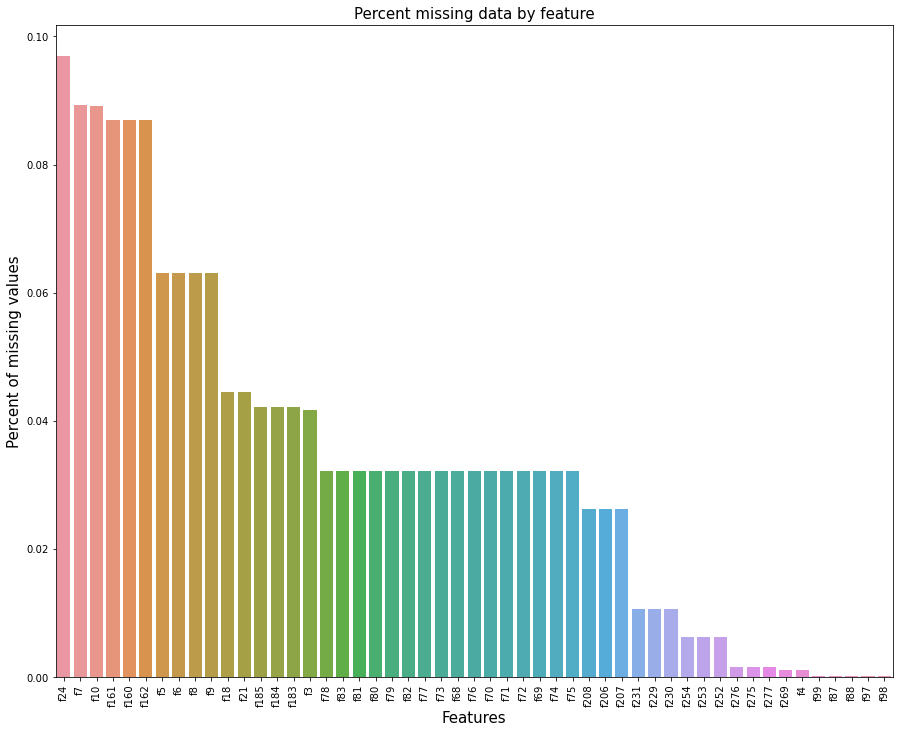

In [8]:
train_missing = df_test.isnull().sum(axis = 0)[all_data.isnull().sum(axis = 0) > 0]/len(all_data)
missing_data = pd.DataFrame({'Missing Ratio' :train_missing})
missing_data = missing_data['Missing Ratio'].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Target

In [9]:
y = np.array(y)

<BarContainer object of 300 artists>

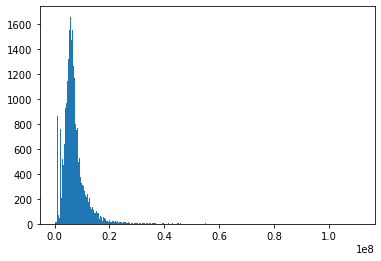

In [10]:
plt.hist(y,bins = 300)[2]

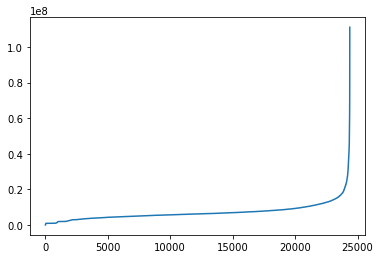

In [11]:
plt.plot(sorted(y))

<BarContainer object of 300 artists>

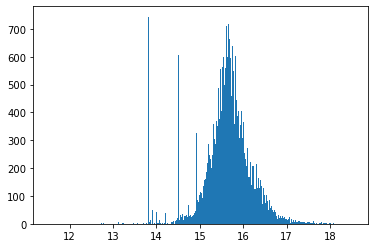

In [12]:
plt.hist(np.log(y),bins = 300)[2]

## Object

In [18]:
index_object = all_data.dtypes[all_data.dtypes == object].index

In [19]:
all_data[index_object].head()

,f1,f11,f12,f29,f33,f34,f35,f36,f37,f38,f39,f40,f106,f114,f118,f152
0,2014-01-29,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2014-04-07,OwnerOccupier,Poselenie Filimonkovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
2,2012-05-18,Investment,Lomonosovskoe,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory
3,2013-02-08,Investment,Juzhnoe Tushino,no,no,no,no,no,no,no,no,no,no,no,no,poor
4,2014-01-10,Investment,Ochakovo-Matveevskoe,no,yes,no,no,no,no,no,no,no,no,no,no,satisfactory


In [20]:
all_data[index_object].isnull().sum()

f1      0
f11     0
f12     0
f29     0
f33     0
f34     0
f35     0
f36     0
f37     0
f38     0
f39     0
f40     0
f106    0
f114    0
f118    0
f152    0
dtype: int64

## Районы

In [41]:
popular = list(all_data.f12.value_counts()[0:10].keys())

In [42]:
popular

['Poselenie Sosenskoe',
 'Nekrasovka',
 'Poselenie Vnukovskoe',
 'Poselenie Moskovskij',
 'Poselenie Voskresenskoe',
 'Mitino',
 'Tverskoe',
 'Krjukovo',
 "Mar'ino",
 'Poselenie Filimonkovskoe']

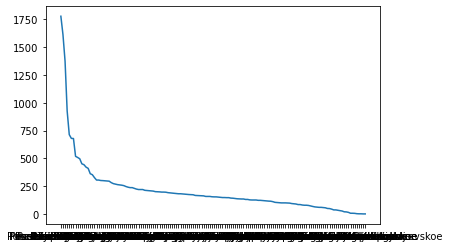

In [22]:
plt.plot(all_data.f12.value_counts())

In [26]:
def transform(data):
    tfm_data = data.copy()
    tfm_data['f1'] = pd.to_datetime(tfm_data['f1'])
    tfm_data['f1_year'] = tfm_data['f1'].dt.year
    tfm_data['f1_month'] = tfm_data['f1'].dt.month
    tfm_data['f1_day'] = tfm_data['f1'].dt.day
    tfm_data = tfm_data.drop(columns=['f1'])
    
    tfm_data = pd.get_dummies(tfm_data, columns=['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118','f152'], 
                                 prefix = ['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118','f152'])
    tfm_data["first"] = (tfm_data['f12'].apply(lambda x : 
                               x in popular)).apply(int)
    tfm_data["second"] = tfm_data['f12'].apply(lambda x : 
                               x not in popular).apply(int)
    tfm_data = tfm_data.drop(columns=['f12'])
    
    #rep_map = {'f152': {'excellent': 5, 'good': 4, 'satisfactory': 3, 'poor': 2,'no data': 1}}
    #tfm_data = tfm_data.replace(rep_map)
    return tfm_data

In [27]:
def missing(data):
    tfm_data = data.copy()
    # много пропусков
    #tfm_data = tfm_data.drop(columns=['f7'])
    #tfm_data = tfm_data.drop(columns=['f10'])
    #tfm_data = tfm_data.drop(columns=['f24'])
    #tfm_data = tfm_data.drop(columns=['f160'])
    #tfm_data = tfm_data.drop(columns=['f161'])
    #tfm_data = tfm_data.drop(columns=['f162'])
    
    #удалить f6      7650 
    #        f8      7650
    #tfm_data = tfm_data.drop(columns=['f6'])
    #tfm_data = tfm_data.drop(columns=['f8'])
    
    tfm_data['f77'] = tfm_data['f77'].fillna(0)
    
    tfm_data = tfm_data.fillna(tfm_data.median())
    #print(tfm_data.median())
    
    
    
    return tfm_data  

In [28]:
train_data = df_train.copy()
test_data = df_test.copy()

In [29]:
train_data_tf = transform(train_data)
test_data_tf = transform(test_data)

In [30]:
ftest_data = missing(test_data_tf)
ftrain_data = missing(train_data_tf)


In [31]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor



### Random Forest

In [33]:
RandomForest = RandomForestRegressor(random_state=0,max_features = 100 )
n_scores = cross_val_score(RandomForest, ftrain_data, y, cv=10, n_jobs=-1,scoring='neg_mean_squared_log_error')
print(n_scores)
print('SCORE: %.2f (%.2f)' % (np.mean(n_scores), np.std(n_scores)))

[-0.1978618  -0.21737032 -0.21877169 -0.20392999 -0.21723559 -0.22325771
 -0.22536116 -0.22053712 -0.23247237 -0.23207449]
SCORE: -0.22 (0.01)


### AdaBoostRegressor


### CatBoostRegressor

In [39]:
CatBoost = CatBoostRegressor(random_state=0)
n_scores = cross_val_score(CatBoost, ftrain_data, y, cv=3, n_jobs=-1,scoring='neg_mean_squared_log_error')
print(n_scores)
print('SCORE: %.2f (%.2f)' % (np.mean(n_scores), np.std(n_scores)))

[-0.2073117  -0.21463507         nan]
SCORE: nan (nan)


In [ ]:
CatBoost = CatBoostRegressor(random_state=0)
CatBoost.fit(ftrain_data,y)
res = CatBoost.predict(ftest_data)

In [ ]:
res.shape

In [ ]:
col = np.array(range(1,len(res)+1))
result = np.c_[col,res]
print(result)
with open("sample_sabmission.csv", "wb") as f:
    f.write(b'id,prediction\n')
    np.savetxt(f, result, fmt='%i', delimiter=",")

In [44]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        
__main__:
twoSum([1,2],4)

IndentationError: expected an indented block (<ipython-input-44-0a0d70ede589>, line 3)